# <font color=yellow>Chapter 7 - Exercises</font>

## 7.

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [2]:
X = mnist['data']
y = mnist['target']

In [3]:
X_train = X[:50000]
y_train = y[:50000]
X_test = X[60000:]
y_test = y[60000:]
X_valid = X[50000:60000]
y_valid = y[50000:60000]

### Base Models

- SVC

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [7]:
X_train_svm_grid=X_train[:10000]
y_train_svm_grid = y_train[:10000]

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
X_train_svm_grid_std = scaler.fit_transform(X_train_svm_grid)

In [10]:
svc_param_grid = {"kernel":["rbf"], "C":[0.5, 1, 3, 5, 8]}
search_svc = GridSearchCV(estimator=SVC(probability=True, verbose=True, random_state=42, gamma="scale"), n_jobs=6, cv=5, verbose=2, param_grid=svc_param_grid)
search_svc.fit(X_train_svm_grid_std, y_train_svm_grid)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[LibSVM]

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  25 out of  25 | elapsed: 25.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=42, shrinking=True,
                           tol=0.001, verbose=True),
             iid='warn', n_jobs=6,
             param_grid={'C': [0.5, 1, 3, 5, 8], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(search_svc.best_estimator_.predict(X_train_svm_grid_std), y_train_svm_grid)

0.9988

In [5]:
import joblib

In [15]:
joblib.dump(search_svc.best_estimator_, "svc_search_best.xz")

['svc_search_best.xz']

In [6]:
best_svc = joblib.load("svc_search_best.xz")

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

In [10]:
best_svc.fit(X_train_std, y_train)

[LibSVM]

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=True)

In [37]:
X_valid_std = scaler.transform(X_valid)

In [8]:
from matplotlib.pyplot import imshow
imshow(X_valid_std[1].reshape(28,28), cmap='gray_r')

NameError: name 'X_valid_std' is not defined

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, best_svc.predict(X_valid_std))

0.9746

- RandomForest

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
from sklearn.model_selection import GridSearchCV
forest_param_grid = {"n_estimators":[800, 900], "max_depth":[20, 26], "min_samples_leaf":[7, 10]}
search_rnd_forest = GridSearchCV(estimator=RandomForestClassifier(random_state=42, verbose=False, n_jobs=6), param_grid=forest_param_grid, cv=3, verbose=2)
search_rnd_forest.fit(X_train_std, y_train)



Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] max_depth=20, min_samples_leaf=7, n_estimators=800 ..............
[CV]  max_depth=20, min_samples_leaf=7, n_estimators=800, total= 1.0min
[CV] max_depth=20, min_samples_leaf=7, n_estimators=800 ..............
[CV]  max_depth=20, min_samples_leaf=7, n_estimators=800, total= 1.0min
[CV] max_depth=20, min_samples_leaf=7, n_estimators=800 ..............
[CV]  max_depth=20, min_samples_leaf=7, n_estimators=800, total= 1.0min
[CV] max_depth=20, min_samples_leaf=7, n_estimators=900 ..............
[CV]  max_depth=20, min_samples_leaf=7, n_estimators=900, total= 1.2min
[CV] max_depth=20, min_samples_leaf=7, n_estimators=900 ..............
[CV]  max_depth=20, min_samples_leaf=7, n_estimators=900, total= 1.2min
[CV] max_depth=20, min_samples_leaf=7, n_estimators=900 ..............
[CV]  max_depth=20, min_samples_leaf=7, n_estimators=900, total= 1.1min
[CV] max_depth=20, min_samples_leaf=10, n_estimators=800 .............
[CV]  max_d

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 26.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=6,
                                              oob_score=False, random_state=42,
                                              verbose=False, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={

In [27]:
search_rnd_forest.best_params_

{'max_depth': 26, 'min_samples_leaf': 7, 'n_estimators': 800}

In [28]:
from sklearn.metrics import accuracy_score
search_rnd_forest.best_score_




0.95476

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, search_rnd_forest.best_estimator_.predict(X_train_std))


0.9851

In [32]:
X_valid_std = scaler.transform(X_valid)

In [33]:
from matplotlib.pyplot import imshow

0.9668

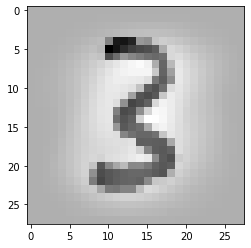

In [39]:
imshow(X_valid_std[0].reshape(28,28), cmap='gray_r')

accuracy_score(y_valid, search_rnd_forest.best_estimator_.predict(X_valid_std))

In [40]:
joblib.dump(search_rnd_forest.best_estimator_, "rnd_forest_best.xz")

['rnd_forest_best.xz']

- Extra tree

In [41]:
from sklearn.ensemble import ExtraTreesClassifier

In [43]:
extra_tree_param = {"n_estimators":[800, 900], "max_depth":[20, 25], "min_samples_leaf":[7, 10]}
extra_tree_search = GridSearchCV(estimator=ExtraTreesClassifier(random_state=42, n_jobs=6), param_grid=extra_tree_param, cv=3, verbose=2)
extra_tree_search.fit(X_train_std, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] max_depth=20, min_samples_leaf=7, n_estimators=800 ..............
[CV]  max_depth=20, min_samples_leaf=7, n_estimators=800, total=  56.3s
[CV] max_depth=20, min_samples_leaf=7, n_estimators=800 ..............
[CV]  max_depth=20, min_samples_leaf=7, n_estimators=800, total=  54.3s
[CV] max_depth=20, min_samples_leaf=7, n_estimators=800 ..............
[CV]  max_depth=20, min_samples_leaf=7, n_estimators=800, total=  54.8s
[CV] max_depth=20, min_samples_leaf=7, n_estimators=900 ..............
[CV]  max_depth=20, min_samples_leaf=7, n_estimators=900, total= 1.0min
[CV] max_depth=20, min_samples_leaf=7, n_estimators=900 ..............
[CV]  max_depth=20, min_samples_leaf=7, n_estimators=900, total= 1.0min
[CV] max_depth=20, min_samples_leaf=7, n_estimators=900 ..............
[CV]  max_depth=20, min_samples_leaf=7, n_estimators=900, total= 1.0min
[CV] max_depth=20, min_samples_leaf=10, n_estimators=800 .............
[CV]  max_d

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   56.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 24.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                            criterion='gini', max_depth=None,
                                            max_features='auto',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators='warn', n_jobs=6,
                                            oob_score=False, random_state=42,
                                            verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [20, 25], 'min

In [46]:
accuracy_score(y_train, extra_tree_search.best_estimator_.predict(X_train_std))

0.98622

In [47]:
accuracy_score(y_valid, extra_tree_search.best_estimator_.predict(X_valid_std))

0.9647

In [48]:
joblib.dump(extra_tree_search.best_estimator_, "extra_tree_best.xz")

['extra_tree_best.xz']

- Voting

In [49]:
from sklearn.ensemble import VotingClassifier

In [50]:
voting_soft = VotingClassifier(estimators=[('smv', best_svc), ('forest', search_rnd_forest.best_estimator_), ('extra',extra_tree_search.best_estimator_)],
                               n_jobs=3, voting='soft')
voting_soft.fit(X_train_std, y_train)

VotingClassifier(estimators=[('smv',
                              SVC(C=5, cache_size=200, class_weight=None,
                                  coef0=0.0, decision_function_shape='ovr',
                                  degree=3, gamma='scale', kernel='rbf',
                                  max_iter=-1, probability=True,
                                  random_state=42, shrinking=True, tol=0.001,
                                  verbose=True)),
                             ('forest',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=26,
                                                     max_features='au...
                                                   class_weight=None,
                                                   criterion='gini',
                

In [51]:
accuracy_score(y_train, voting_soft.predict(X_train_std))

0.9974

In [52]:
accuracy_score(y_valid, voting_soft.predict(X_valid_std))

0.9809

goood

In [54]:
X_train_valid = X[:60000]
y_train_valid = y[:60000]
X_train_valid_std = scaler.fit_transform(X_train_valid)


In [55]:
voting_soft.fit(X_train_valid_std, y_train_valid)

VotingClassifier(estimators=[('smv',
                              SVC(C=5, cache_size=200, class_weight=None,
                                  coef0=0.0, decision_function_shape='ovr',
                                  degree=3, gamma='scale', kernel='rbf',
                                  max_iter=-1, probability=True,
                                  random_state=42, shrinking=True, tol=0.001,
                                  verbose=True)),
                             ('forest',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=26,
                                                     max_features='au...
                                                   class_weight=None,
                                                   criterion='gini',
                

In [57]:
accuracy_score(y_train_valid,voting_soft.predict(X_train_valid_std))

0.9972166666666666

In [58]:
X_test_std = scaler.transform(X_test)
test_preds_voting_soft = voting_soft.predict(X_test_std)

In [59]:
accuracy_score(y_test, test_preds_voting_soft)

0.9786

## 8.

